# Visual

In [1]:
from io import StringIO
import pandas as pd
import numpy as np
import os
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.constants import physical_constants, milli

import sys
sys.path.append("..")

import src.core.config as cfg
from src.elegant import utils, eleget, eleput

pd.options.plotting.backend = "plotly"

In [2]:
utils._run_elegant_process()

In [3]:
beamline_data = utils.sdds_to_df(file=cfg.ELEGANT_BEAMLINE_DATA_FILE, columns=cfg.ELEGANT_BEAMLINE_DATA_COLUMNS)
twiss_data = utils.sdds_to_df(file=cfg.ELEGANT_TWISS_DATA_FILE, columns=cfg.ELEGANT_TWISS_DATA_COLUMNS)
centroid_data = utils.sdds_to_df(file=cfg.ELEGANT_CENTROID_DATA_FILE, columns=cfg.ELEGANT_CENTROID_DATA_COLUMNS)

In [4]:
twiss_data["p"] = twiss_data["pCentral0"]*physical_constants["electron mass energy equivalent in MeV"][0]
centroid_data["p"] = centroid_data["pCentral"]*physical_constants["electron mass energy equivalent in MeV"][0]

e_nx = 10.2 # normalized emittance [mm*mrad]
e_ny = e_nx

twiss_data['emitx'] = e_nx * milli * milli / (twiss_data['p']/physical_constants["electron mass energy equivalent in MeV"][0]) # geometric emittance [m]
twiss_data['emity'] = e_ny * milli * milli / (twiss_data['p']/physical_constants["electron mass energy equivalent in MeV"][0]) # geometric emittance [m]
twiss_data['dp/p'] = 0

twiss_data['sigmax'] = np.sqrt(twiss_data['betax']*twiss_data['emitx'] + twiss_data['etax']*twiss_data['etax']*twiss_data['dp/p']*twiss_data['dp/p']) # mm
twiss_data['sigmay'] = np.sqrt(twiss_data['betay']*twiss_data['emity'] + twiss_data['etay']*twiss_data['etay']*twiss_data['dp/p']*twiss_data['dp/p']) # mm

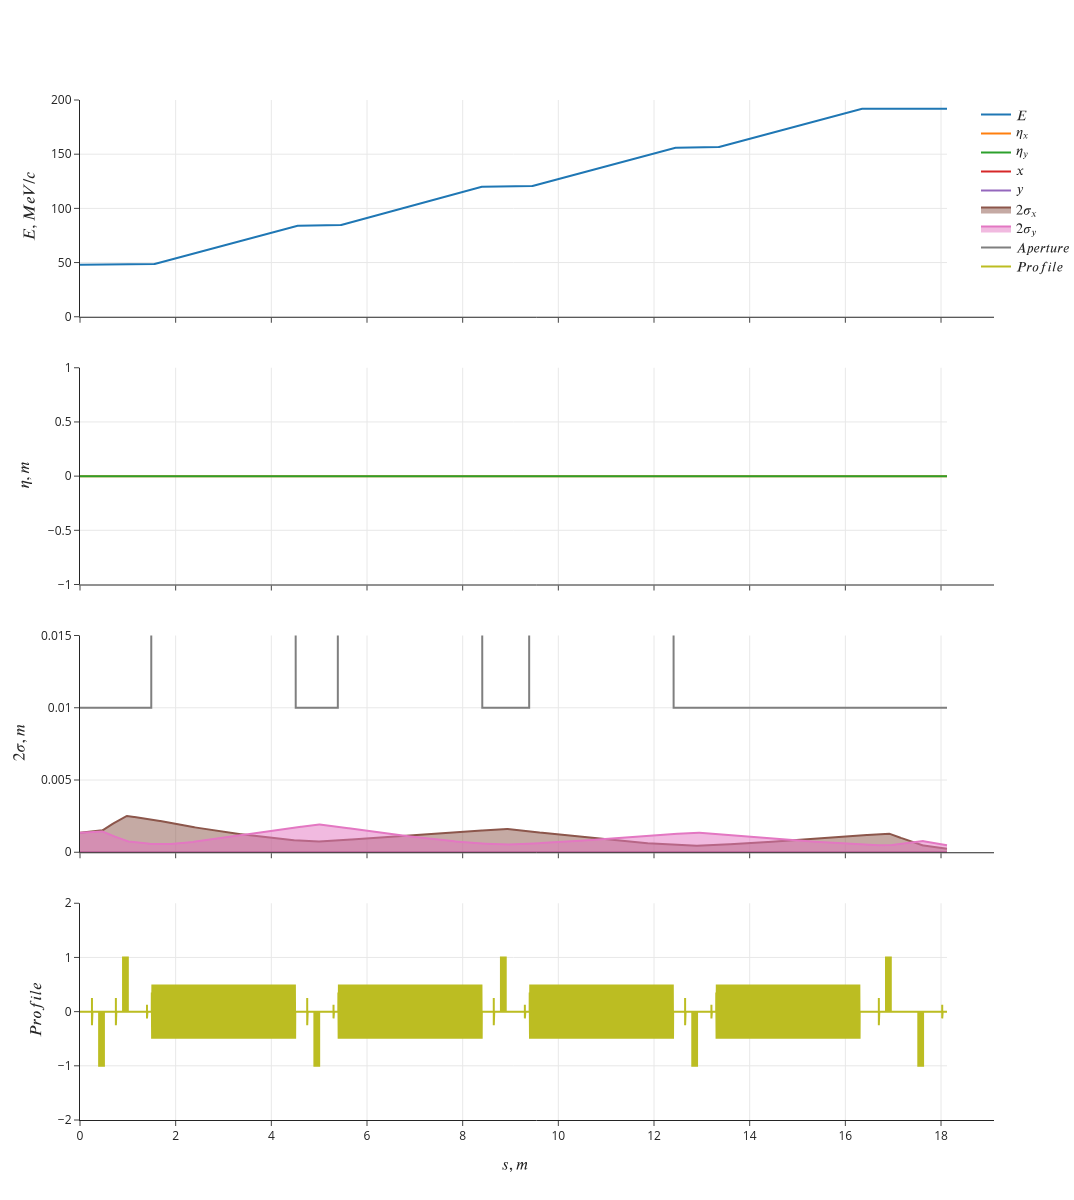

In [8]:
fig = make_subplots(
    rows=4, cols=1, shared_xaxes=True, vertical_spacing=0.05,
)

fig.add_trace(
    go.Scatter(x=twiss_data["s"], y=twiss_data["p"], name=r'$E$',
               hovertemplate=(
                   "<b>s</b>: %{x:.2f} m<br>"
                   "<b>Energy</b>: %{y:.2f} MeV/c<br>"
                    "<extra></extra>"
               )
    ),
    row=1, col=1,
)

fig.add_trace(
    go.Scatter(x=twiss_data["s"], y=twiss_data["etax"], name=r'$\eta_x$',
               hovertemplate=(
                   "<b>s</b>: %{x:.2f} m<br>"
                   "<b>Dispersion x</b>: %{y:.2f} m<br>"
                    "<extra></extra>"
               )
    ),
    row=2, col=1,
)

fig.add_trace(
    go.Scatter(x=twiss_data["s"], y=twiss_data["etay"], name=r'$\eta_y$',
               hovertemplate=(
                   "<b>s</b>: %{x:.2f} m<br>"
                   "<b>Dispersion y</b>: %{y:.2f} m<br>"
                    "<extra></extra>"
               )
    ),
    row=2, col=1,
)

fig.add_trace(
    go.Scatter(x=centroid_data["s"], y=centroid_data["Cx"], name=r'$x$',
               hovertemplate=(
                   "<b>s</b>: %{x:.2f} m<br>"
                   "<b>Centroid x</b>: %{y:.2f} m<br>"
                    "<extra></extra>"
               )
    ),
    row=3, col=1,
)

fig.add_trace(
    go.Scatter(x=centroid_data["s"], y=centroid_data["Cy"], name=r'$y$',
               hovertemplate=(
                   "<b>s</b>: %{x:.2f} m<br>"
                   "<b>Centroid y</b>: %{y:.2f} m<br>"
                    "<extra></extra>"
               )
    ),
    row=3, col=1,
)

fig.add_trace(
    go.Scatter(x=twiss_data["s"], y=2*twiss_data["sigmax"], fill="tozeroy", name=r'$2\sigma_x$', 
               hovertemplate=(
                   "<b>s</b>: %{x:.2f} m<br>"
                   "<b>Envelope x</b>: %{y:.2f} m<br>"
                    "<extra></extra>"
               )
    ),
    row=3, col=1,
)

fig.add_trace(
    go.Scatter(x=twiss_data["s"], y=2*twiss_data["sigmay"], fill="tozeroy", name=r'$2\sigma_y$',
               hovertemplate=(
                   "<b>s</b>: %{x:.2f} m<br>"
                   "<b>Envelope y</b>: %{y:.2f} m<br>"
                    "<extra></extra>"
               )
    ),
    row=3, col=1,
)

fig.add_trace(
    go.Scatter(x=twiss_data["s"], y=twiss_data["xAperture"], name=r"$Aperture$",
               hovertemplate=(
                   "<b>s</b>: %{x:.2f} m<br>"
                   "<b>Aperture</b>: %{y:.2f} m<br>"
                    "<extra></extra>"
               )
    ),
    row=3, col=1,
)

fig.add_trace(
    go.Scatter(x=beamline_data["s"], y=beamline_data["Profile"], text=beamline_data["ElementName"], name=r"$Profile$",
               hovertemplate=(
                   "<b>s</b>: %{x:.2f} m<br>"
                   "<b>Name</b>: %{text}<br>"
                    "<extra></extra>"
               )
    ),
    row=4, col=1
)

fig.update_layout(
    height=1200, template="simple_white", showlegend=True,
)

fig.update_xaxes(showgrid=True, row=1, col=1)
fig.update_yaxes(title_text=r"$E, MeV/c$", range=(0, 200), showgrid=True, row=1, col=1)

fig.update_xaxes(showgrid=True, row=2, col=1)
fig.update_yaxes(title_text=r"$\eta, m$", showgrid=True, row=2, col=1)

fig.update_xaxes(showgrid=True, row=3, col=1)
fig.update_yaxes(title_text=r"$2\sigma, m$", range=(0, 15e-3), showgrid=True, row=3, col=1)

fig.update_xaxes(title_text=r"$s, m$", showgrid=True, row=4, col=1)
fig.update_yaxes(title_text=r"$Profile$", range=(-2, 2), showgrid=True, row=4, col=1)

fig.show()

In [6]:
MOTOR_RANGE = [0, 1e-3]

MOTORS = [  
    ["MG-LA1.CL1.HKICK", MOTOR_RANGE],
    ["MG-LA1.CL2.HKICK", MOTOR_RANGE],
    ["MG-LA2.CL3.HKICK", MOTOR_RANGE],
    ["MG-LA3.CL4.HKICK", MOTOR_RANGE],
    ["MG-LA4.CL5.HKICK", MOTOR_RANGE],
    ["MG-LA5.CL6.HKICK", MOTOR_RANGE],      
]

METERS =[
    "BI-LA1.PK3.Cx", 
    "BI-LA2.PK4.Cx", 
    "BI-LA3.PK5.Cx", 
    "BI-LA4.PK6.Cx",
]

In [7]:
import os
import numpy as np

from src.scan import scan
from src.scan.decorators import add_noise_to_input, add_noise_to_output
from src.scan.utils import plot_scan_data, print_scan_data, print_table_scan_data
from src.elegant import eleget, eleput
from src.core import config as cfg


data_scan = scan(
    meters=METERS, 
    motors=MOTORS, 
    get_func=add_noise_to_output(0.5)(eleget), 
    put_func=add_noise_to_input(0.1)(eleput), 
    save=True, 
    callback=[plot_scan_data], 
    verify_motor=True, 
    tolerance=0.1,
    save_original_motor_values=True,
    sample_size=100,
)

ModuleNotFoundError: No module named 'src.tools.scan'

In [ ]:
import os

from src.tools.scan import scan, scan_response_measurements
from src.tools.scan.decorators import response_measurements, add_noise, add_noise
from src.tools.scan.utils import plot_scan_data, print_scan_data, print_table_scan_data, scan_logger
from src.tools.elegant import eleget, eleput
from src.core import config as cfg

result_scan = scan_response_measurements(
    meters=METERS, 
    motors=MOTORS, 
    get_func=add_noise(0.0)(eleget), 
    put_func=add_noise(0.0)(eleput), 
    save=False,
    verify_motor=True, 
    tolerance=0.1,
    save_original_motor_values=True,
    sample_size=1,
    callback=[plot_scan_data], 
)

In [ ]:
MOTOR_RANGE = [-1e-3, 1e-3]

MOTORS = [  
    ["MG-LA1.CL1.HKICK", MOTOR_RANGE],
    ["MG-LA1.CL2.HKICK", MOTOR_RANGE],
    ["MG-LA2.CL3.HKICK", MOTOR_RANGE],
    ["MG-LA3.CL4.HKICK", MOTOR_RANGE],
    ["MG-LA4.CL5.HKICK", MOTOR_RANGE],
    ["MG-LA5.CL6.HKICK", MOTOR_RANGE],      
]

METERS =[
    "BI-LA1.PK3.Cx", 
    "BI-LA2.PK4.Cx", 
    "BI-LA3.PK5.Cx", 
    "BI-LA4.PK6.Cx",
]

In [ ]:
import os

from src.tools.scan import scan, scan_bayesian_optimization
from src.tools.scan.decorators import response_measurements, add_noise
from src.tools.scan.utils import plot_scan_data, print_scan_data, print_table_scan_data, scan_logger
from src.tools.elegant import eleget, eleput
from src.core import config as cfg


result_scan = scan_bayesian_optimization(
    meters=METERS, 
    motors=MOTORS, 
    get_func=add_noise(0.0)(eleget), 
    put_func=add_noise(0.0)(eleput), 
    save=False, 
    callback=[plot_scan_data], 
    verify_motor=False, 
    save_original_motor_values=False,
    sample_size=1,
)

In [ ]:
result_scan